In [43]:
import requests
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sns
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import linear_model, datasets
from sklearn.preprocessing import label_binarize

In [31]:
def plot_multi_roc_curve(y,pred,classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y[:, i],pred[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    #print(fpr)
    #print(tpr)
    #print(roc_auc)
    colors = ['aqua','darkorange','yellow','green','blue','black']
    for i,color in zip(range(classes),colors):
        plt.plot(fpr[i], tpr[i], color=color, label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--',label = 'root')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
iris = datasets.load_iris()
iris.data
X = iris.data[:, :2]  # we only take the first two features.
#print(X)
Y = label_binarize(iris.target,classes=[0,1,2])
#print(Y)
h = .02  # step size in the mesh
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.33,random_state=0)

In [29]:
# kNN : k - Near Neighbors (Classification)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn = knn.fit(X_train, y_train)

print(knn.score(X_train, y_train))

y_predict = knn.predict(X_test)

0.88


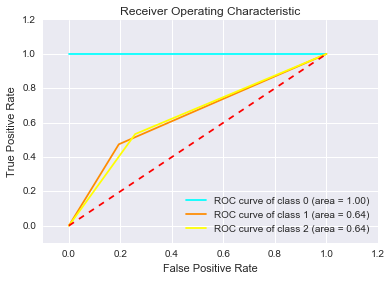

In [32]:
# Get success rate of the model
plot_multi_roc_curve(y_test, y_predict,3) # [:,1] for only 2 classes (e.g. Legitimate or Malicious site)

Confusion matrix, without normalization
[[85 15  0]
 [17 33  0]
 [ 0  0  0]]


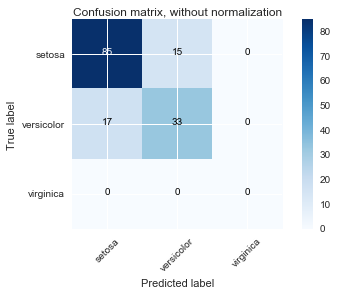

In [50]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.flatten(), y_predict.flatten(),labels=[0,1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris.target_names,title='Confusion matrix')